# Importing Libraries

In [ ]:
#pip install --upgrade numpy pandas tensorflow keras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv("P614 DATASET.csv")
dataset.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
5,2012-01-10,60.844284,60.857143,60.214287,60.462856,52.248333,64549100
6,2012-01-11,60.382858,60.407143,59.901428,60.364285,52.163139,53771200
7,2012-01-12,60.325714,60.414288,59.821430,60.198570,52.019955,53146800
8,2012-01-13,59.957142,60.064285,59.808571,59.972858,51.824898,56505400
9,2012-01-17,60.599998,60.855713,60.422855,60.671429,52.428562,60724300


In [ ]:
df = dataset.copy()

# Data Exploration


In [ ]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2011.0,1.267075e+02,5.048375e+01,5.542429e+01,8.588286e+01,1.130500e+02,1.651900e+02,2.911200e+02
High,2011.0,1.278276e+02,5.092630e+01,5.708571e+01,8.671786e+01,1.141900e+02,1.674100e+02,2.939700e+02
Low,2011.0,1.255803e+02,5.012494e+01,5.501429e+01,8.505643e+01,1.118700e+02,1.634250e+02,2.881200e+02
Close,2011.0,1.267412e+02,5.057837e+01,5.579000e+01,8.620214e+01,1.130500e+02,1.652450e+02,2.915200e+02
Adj Close,2011.0,1.195055e+02,5.243844e+01,4.892193e+01,7.505668e+01,1.052229e+02,1.600471e+02,2.895226e+02
Volume,2011.0,5.949670e+07,4.683856e+07,1.136200e+07,2.758565e+07,4.346900e+07,7.471030e+07,3.765300e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

In [ ]:
df.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


# Data Preprocessing

In [ ]:
df = df.set_index('Date').sort_index()

In [ ]:
# Resampling the date frequency to Day
fq_d = df['Close'].asfreq('D')

In [ ]:
fq_d = fq_d.ffill()

In [ ]:
# Resampling the Date frequency to business days frequency
fq_bd = df['Close'].asfreq('B')

In [ ]:
fq_bd = fq_bd.ffill()
print(fq_bd.isna().sum())

0


In [ ]:
fq_bd.name = 'stock_price'
fq_d.name = 'stock_price'

In [ ]:
fq_d.shape

(2919,)

# EDA

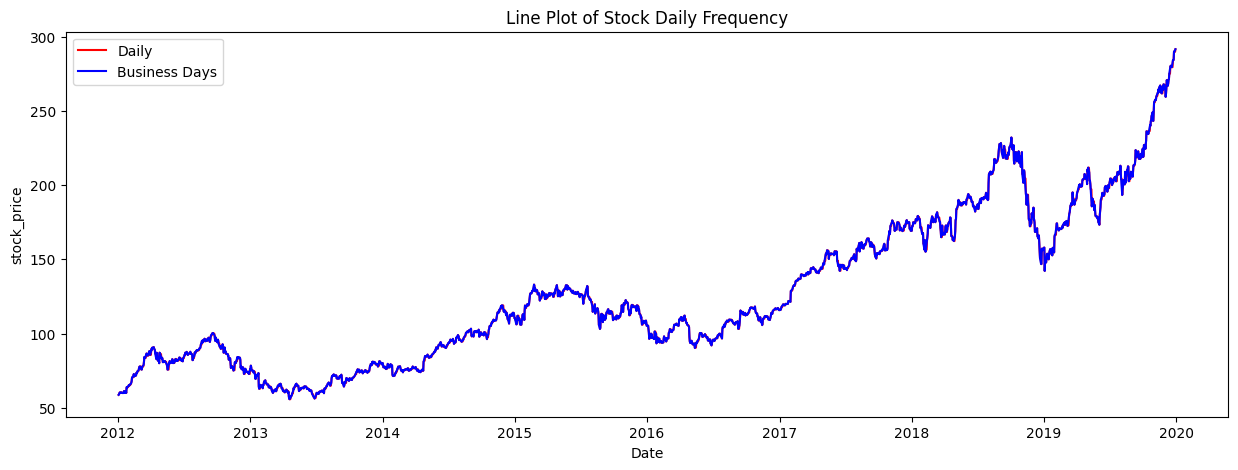

In [ ]:
plt.figure(figsize = (15,5))
sns.lineplot(data = fq_d, color = 'red', label = 'Daily')
sns.lineplot(data = fq_bd, color = 'blue', label = 'Business Days')
plt.title('Line Plot of Stock Daily Frequency')
plt.show()



In [ ]:
percent_change = fq_bd.pct_change()
percent_change.describe()

,stock_price
count,2084.000000
mean,0.000895
std,0.015836
min,-0.123558
25%,-0.006461
50%,0.000172
75%,0.009151
max,0.088741


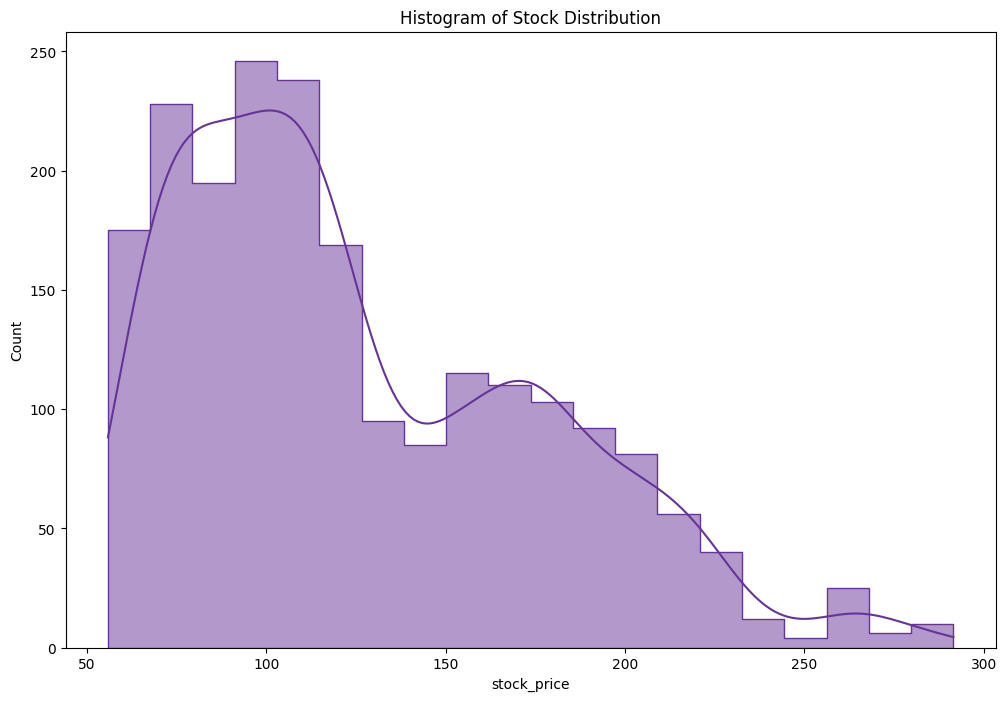

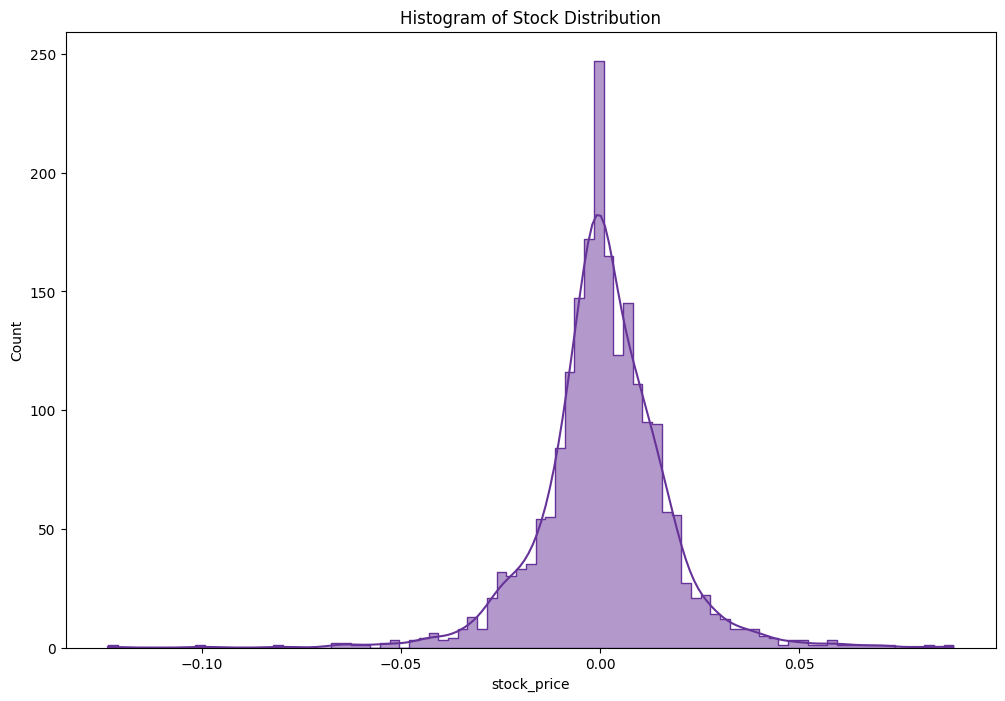

In [ ]:
plt.figure(figsize = (12,8))
sns.histplot(fq_bd, kde = True, element = 'step', multiple = 'layer', color = 'rebeccapurple')
plt.title('Histogram of Stock Distribution')
plt.show()

plt.figure(figsize = (12,8))
sns.histplot(fq_bd.pct_change(), kde = True, element = 'step', multiple = 'layer', color = 'rebeccapurple')
plt.title('Histogram of Stock Distribution')
plt.show()

Roughly symmetric, centered around zero after pct change. There's a noticable left skew which tells the stock prices have decreased few times when compared to previous day

## Decomposition

In [ ]:
#import sys
#!{sys.executable} -m pip install statsmodels

In [ ]:
from statsmodels.tsa.seasonal import STL

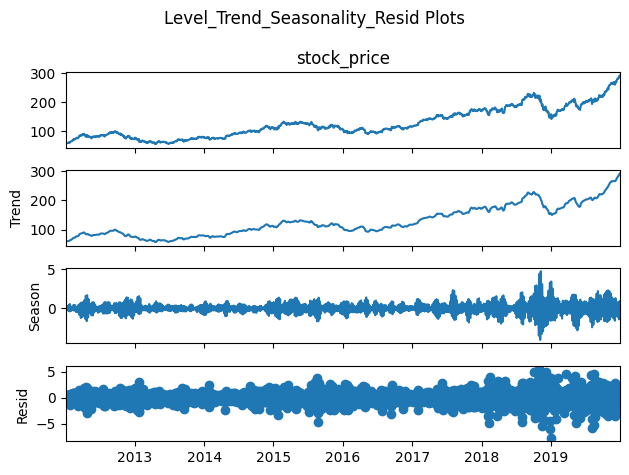

In [ ]:
stl_decomposition = STL(fq_bd).fit()
stl_decomposition.plot()
plt.suptitle('Level_Trend_Seasonality_Resid Plots')
plt.subplots_adjust(top=0.85)
plt.show()

**Trend**:

The trend line confirms a strong, persistent positive trend. The stock price has consistently increased over the years.

**Seasonality**:

This strongly suggests that there is no strong, fixed-period seasonality present in this stock price data. Most stock prices do not exhibit strong seasonality over time.

**Residuals**:

The residuals are scattered around zero, which is generally a good sign, indicating that the Trend and Season components have captured the structured variation in the data well.

The variance of the residuals appears to increase over time, particularly in the later years (post-2018). This means the unexplained volatility in the stock price has risen, suggesting that the model's predictive accuracy for the remaining randomness might be lower in the latter period.

There are several distinct points (circled) that are further away from the zero line, especially around 2019, which represent irregular or extreme price movements not accounted for by the long-term trend or seasonality.


## Lag Plots

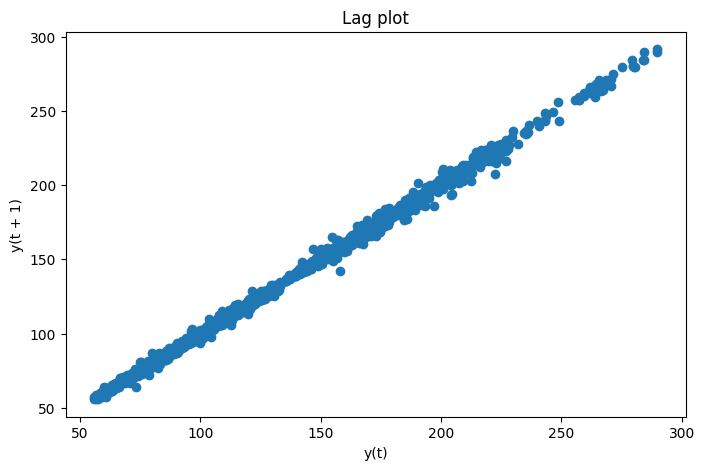

In [ ]:
plt.figure(figsize =(8,5))
pd.plotting.lag_plot(fq_bd, lag =1)
plt.title('Lag plot')
plt.show()

**The linear pattern indicates that todays price is strongly correlated with yesterdays.**

## Test for Stationarity - Augmented Dickey Fuller Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
print(adfuller(fq_bd, autolag = "AIC"))

(np.float64(0.9784275763275044), np.float64(0.9940330382763088), 26, 2058, {'1%': np.float64(-3.433531474838333), '5%': np.float64(-2.862945426040308), '10%': np.float64(-2.567518185091057)}, np.float64(8871.05142625511))


In [ ]:
def adf_test(data):
    if adfuller(data)[1]>=0.05:
        print('The Data is not Stationery')
    else:
        print('The Data is Stationaery')
    print(f'ADF Stats : {adfuller(data)[0]}')
    print(f'p-value : {adfuller(data)[1]}')
    print(f'Confidence Levels : {adfuller(data)[4]}')

In [ ]:
adf_test(fq_bd)

The Data is not Stationery
ADF Stats : 0.9784275763275044
p-value : 0.9940330382763088
Confidence Levels : {'1%': np.float64(-3.433531474838333), '5%': np.float64(-2.862945426040308), '10%': np.float64(-2.567518185091057)}


Hypotheses
Null hypothesis (H₀): The time series has a unit root → it is non-stationary.

Alternative hypothesis (H₁): The time series is stationary.

ADF Statistic	More negative → stronger evidence against H₀

p>= 0.05 -- accept null, p<0.05 reject null

If ADF statistic < critical value → reject H₀ at that confidence level → series is stationary.

If ADF statistic > critical value → fail to reject H₀ → series is non-stationary.

In [ ]:
from statsmodels.tsa.statespace.tools import diff

In [ ]:
diffs = {}
for i in range(1,5):
    diffs[f"diff{i}"] = diff(fq_bd, k_diff = i)

In [ ]:
for i in range(1,5):
    print(f'Differencing with {i}')
    adf_test(diffs[f'diff{i}'])
    print("-"*20)


Differencing with 1
The Data is Stationaery
ADF Stats : -7.644871217058821
p-value : 1.8540849298764147e-11
Confidence Levels : {'1%': np.float64(-3.433531474838333), '5%': np.float64(-2.862945426040308), '10%': np.float64(-2.567518185091057)}
--------------------
Differencing with 2
The Data is Stationaery
ADF Stats : -14.763144015670584
p-value : 2.3850452143197246e-27
Confidence Levels : {'1%': np.float64(-3.433533023432548), '5%': np.float64(-2.8629461097716633), '10%': np.float64(-2.567518549139982)}
--------------------
Differencing with 3
The Data is Stationaery
ADF Stats : -20.884869579338115
p-value : 0.0
Confidence Levels : {'1%': np.float64(-3.4335345735350664), '5%': np.float64(-2.862946794168607), '10%': np.float64(-2.567518913543354)}
--------------------
Differencing with 4
The Data is Stationaery
ADF Stats : -23.214334483587766
p-value : 0.0
Confidence Levels : {'1%': np.float64(-3.4335376782738374), '5%': np.float64(-2.8629481649631496), '10%': np.float64(-2.5675196434

**Differencing with 1 made the data stationery**
We need to chose the d value as 1 to get better results in models like ARIMA and SARIMA. But lets check with the auto arima which gives the best thresholds for p,d,q

## Stationarity Visualization

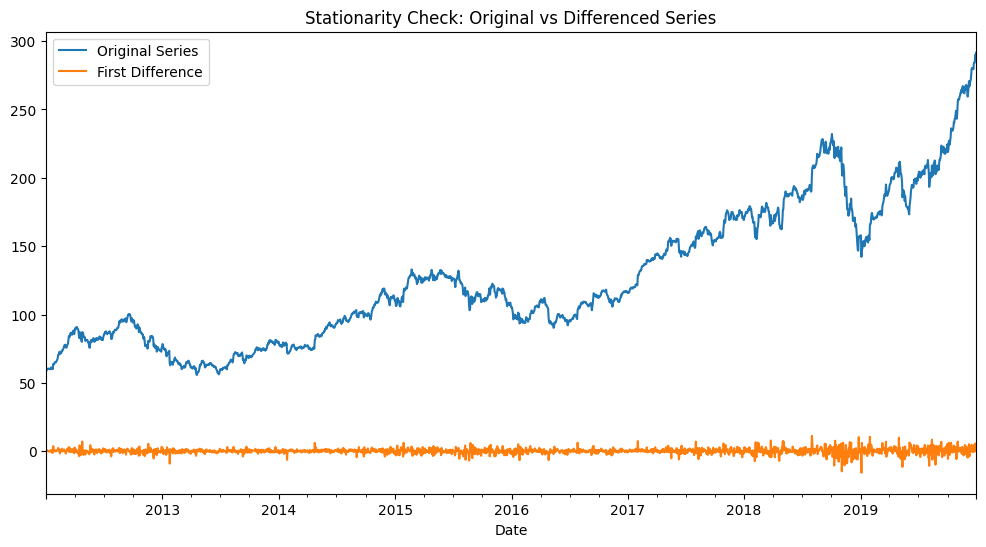

In [ ]:
plt.figure(figsize=(12,6))
fq_bd.plot(label='Original Series')
fq_bd.diff().plot(label='First Difference')
plt.legend()
plt.title("Stationarity Check: Original vs Differenced Series")
plt.show()

**First Difference fluctuates around zero with no visible trend.
Variance appears more stable.
Suggests the series is now stationary**

## ACF and PACF Plost

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

<Figure size 1200x500 with 0 Axes>

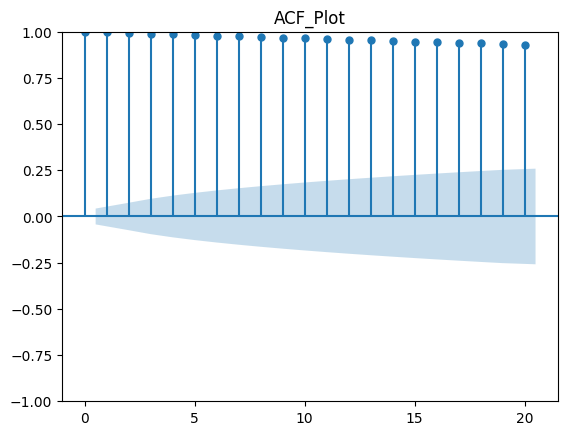

<Figure size 1200x500 with 0 Axes>

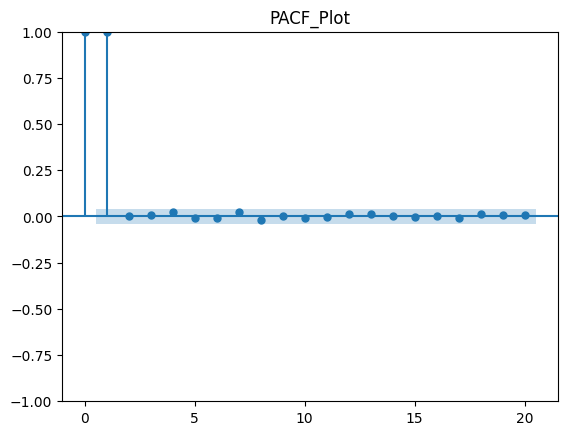

In [ ]:
plt.figure(figsize=(12,5))
plot_acf(fq_bd, lags = 20, title = 'ACF_Plot')
plt.show()

plt.figure(figsize=(12,5))
plot_pacf(fq_bd, lags = 20, title = 'PACF_Plot')
plt.show()

PACF: Sharp cut-off after lag 2	AR(2)

ACF: Slow decay	Non-stationary --- differencing needed

p=2  from PACF

d=1  from ADF test and ACF decay

q=0  no strong MA component seen in ACF

# Split Data

In [ ]:
h = 30
train = fq_bd.iloc[:-h]
test = fq_bd.iloc[-h:]
print(train.shape)
print(test.shape)


(2055,)
(30,)


# Initial Model Building

## Exponential models

### Simple Exponential

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [ ]:
ses = SimpleExpSmoothing(train).fit(optimized=True)


In [ ]:
ses.params

{'smoothing_level': np.float64(0.9999999850988388),
 'smoothing_trend': np.float64(nan),
 'smoothing_seasonal': np.float64(nan),
 'damping_trend': nan,
 'initial_level': np.float64(58.747143),
 'initial_trend': np.float64(nan),
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
ses_forecast = pd.Series(ses.forecast(h), index = test.index)

In [ ]:
ses_forecast.head(10)

,0
Date,
2019-11-19,267.100006
2019-11-20,267.100006
2019-11-21,267.100006
2019-11-22,267.100006
2019-11-25,267.100006
2019-11-26,267.100006
2019-11-27,267.100006
2019-11-28,267.100006
2019-11-29,267.100006


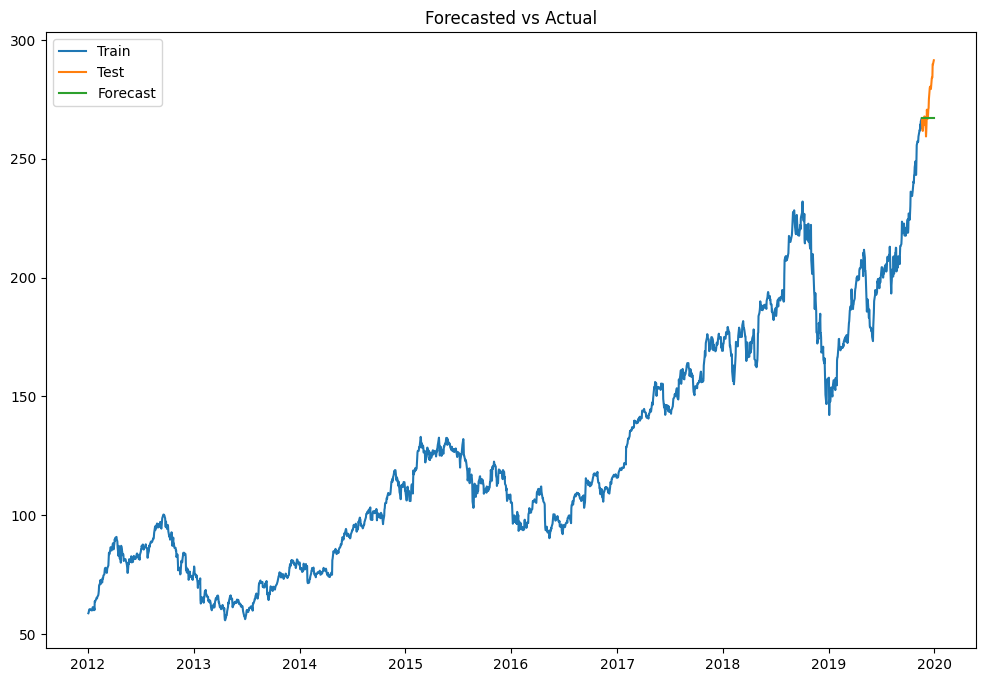

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(ses_forecast, label = 'Forecast')
plt.title('Forecasted vs Actual')
plt.legend()
plt.show()

### Double and Triple Exponential

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import itertools

In [ ]:
best_score = float('inf')
best_params = None

for trend, seasonal, sp in itertools.product (['add','mul'], ['add','mul'], [5,7]):
    model = ExponentialSmoothing(train,trend = trend, seasonal = seasonal, seasonal_periods = sp )
    es = model.fit()
    es_forecast = es.forecast(h)
    mse = mean_squared_error(test,es_forecast)
    rmse = np.sqrt(mse)

    if rmse < best_score:
        best_score = rmse
        best_params = (trend, seasonal, sp)

print(best_score)
print(best_params)



7.995025126720505
('mul', 'mul', 5)


In [ ]:
es = ExponentialSmoothing(train, trend = 'add', seasonal = None).fit()
es_forecast = pd.Series(es.forecast(h), index = test.index)

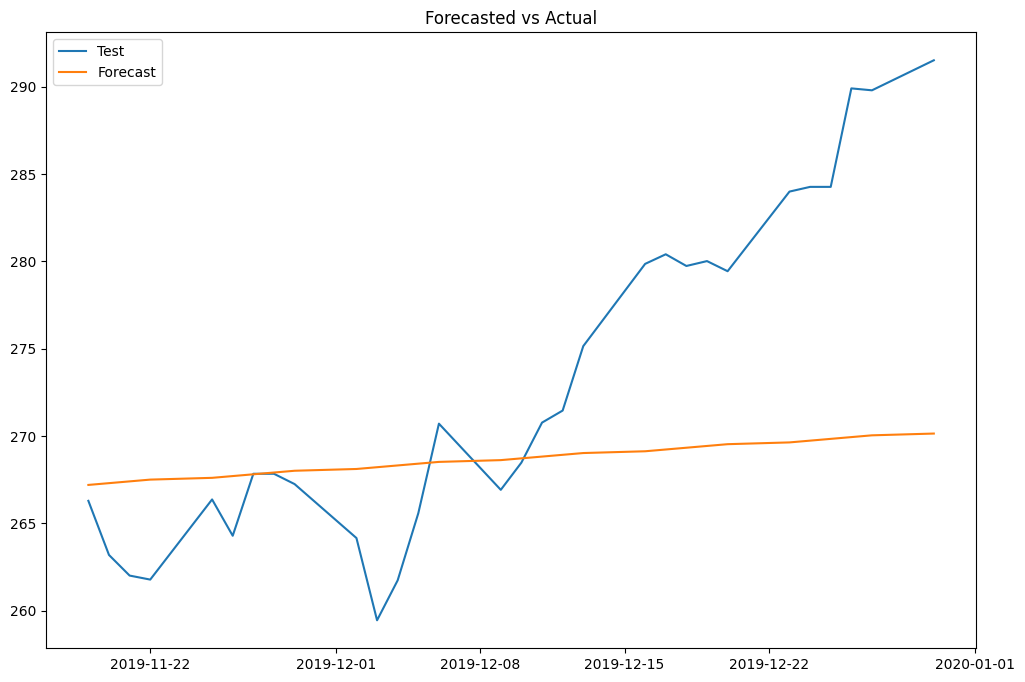

In [ ]:
plt.figure(figsize = (12,8))
#plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(es_forecast, label = "Forecast")
plt.title('Forecasted vs Actual')
plt.legend()
plt.show()

## ARIMA Model

### Auto ARIMA

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 20.8 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

In [ ]:
at_arima = auto_arima(y =train, max_p = 5, max_q = 5, max_d= 5, trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8833.453, Time=3.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8834.424, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8836.089, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8836.049, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8837.320, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8834.403, Time=1.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8833.839, Time=1.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8834.904, Time=2.03 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8828.314, Time=9.58 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8835.577, Time=4.22 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8830.160, Time=14.14 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=8814.787, Time=11.83 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=8834.331, Time=7.22 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=8835.656, Time=8.26 sec
 ARIMA(2,1,5)(0,0,0)[0] interce

### ARIMA

In [ ]:
from statsmodels.tsa.api import ARIMA

In [ ]:
arima = ARIMA(train, order = (3,1,5)).fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            stock_price   No. Observations:                 2055
Model:                 ARIMA(3, 1, 5)   Log Likelihood               -4397.303
Date:                Sat, 27 Dec 2025   AIC                           8812.605
Time:                        06:23:01   BIC                           8863.253
Sample:                    01-03-2012   HQIC                          8831.177
                         - 11-18-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5989      0.041    -14.715      0.000      -0.679      -0.519
ar.L2          0.5647      0.047     12.079      0.000       0.473       0.656
ar.L3          0.8387      0.039     21.771      0.000       0.763       0.914
ma.L1          0.6212      0.043     14.413      0.000       0.537       0.706
ma.L2         -0.6072      0.050    -12.228      0.000      -0.705      -0.510
ma.L3         -0.9116      0.042    -21.479      0.000      -0.995      -0.828
ma.L4          0.0415      0.019      2.187      0.029       0.004       0.079
ma.L5          0.1159      0.016      7.262      0.000       0.085       0.147
sigma2         4.2364      0.068     61.852      0.000       4.102       4.371
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3556.84
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               4.94   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

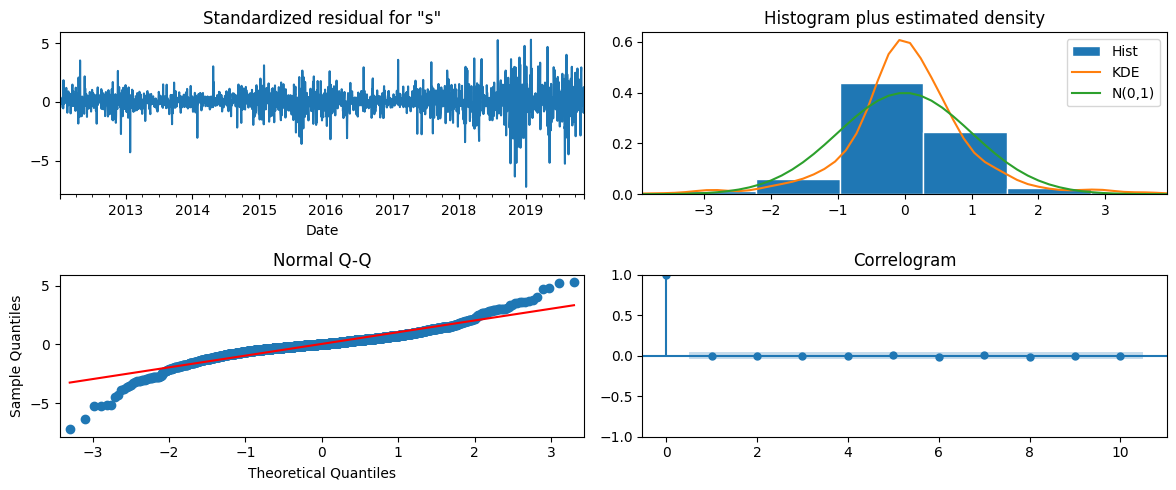

In [ ]:
arima.plot_diagnostics(figsize = (12,5))
plt.tight_layout()
plt.show()

In [ ]:
arima_forecast = arima.forecast(h)

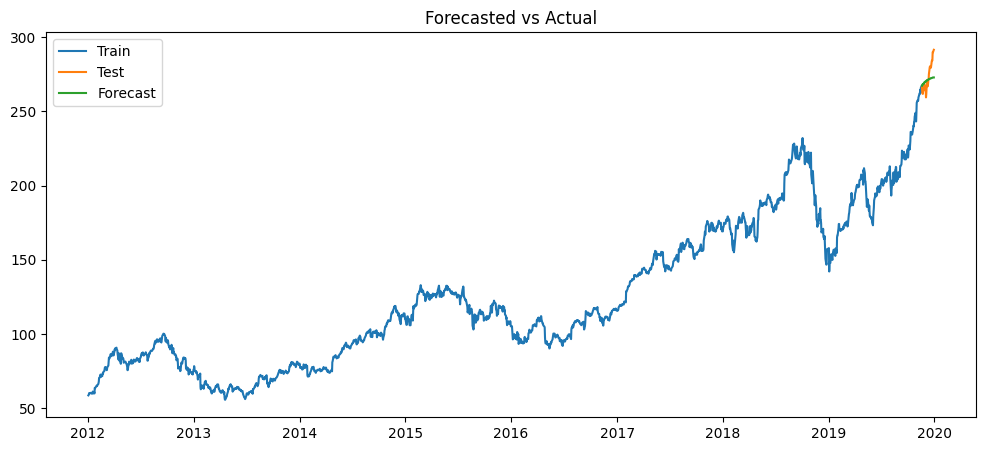

In [ ]:
plt.figure(figsize = (12,5))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(arima_forecast, label = 'Forecast')
plt.title('Forecasted vs Actual')
plt.legend()
plt.show()

## SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
sarima = SARIMAX(train, order = (3,1,5), trend = 'c').fit()
sarima_forecast = sarima.forecast(steps = h)


In [ ]:
sarima_forecast.head(15)

,predicted_mean
2019-11-19,267.327125
2019-11-20,267.814042
2019-11-21,267.824006
2019-11-22,268.630446
2019-11-25,268.678606
2019-11-26,269.124188
2019-11-27,269.571849
2019-11-28,269.607732
2019-11-29,270.225022
2019-12-02,270.263932


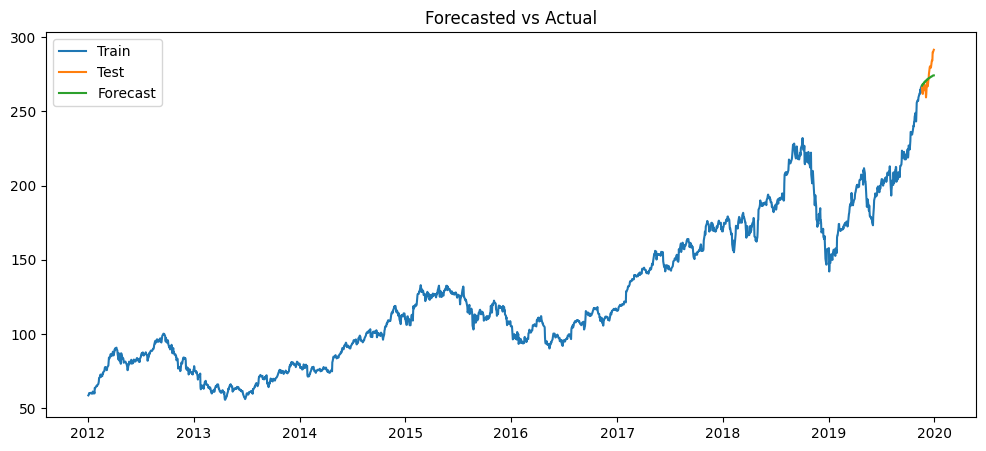

In [ ]:
plt.figure(figsize = (12,5))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(sarima_forecast, label = 'Forecast')
plt.title('Forecasted vs Actual')
plt.legend()
plt.show()

### Log_SARIMA

In [ ]:
log_train = np.log(train)
log_sarima = SARIMAX(log_train, order = (3,1,5), trend = 'c').fit()
log_sarima_forecast = pd.Series(np.exp(log_sarima.get_forecast(steps = h).predicted_mean), index = test.index)

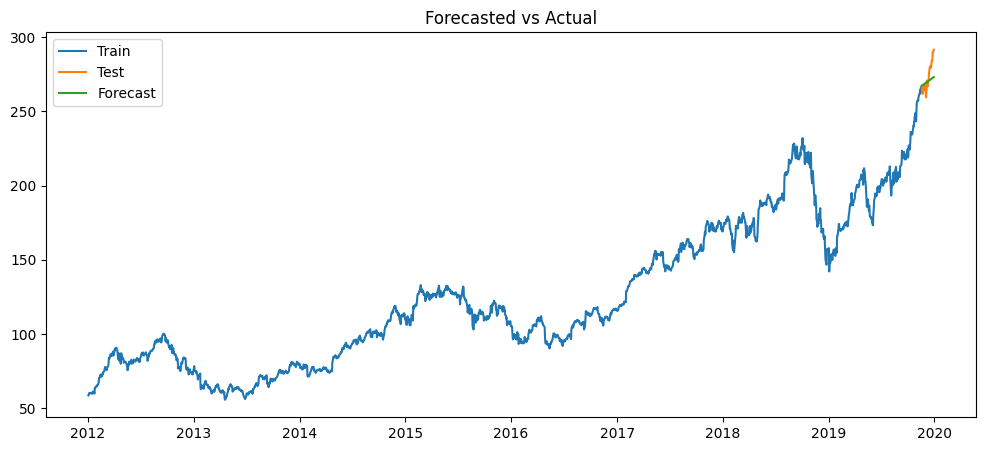

In [ ]:
plt.figure(figsize = (12,5))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(log_sarima_forecast, label = 'Forecast')
plt.title('Forecasted vs Actual')
plt.legend()
plt.show()

# Feature Engineering

As the initial models were not forecasting the data ensemble models might forecast well. For the Regression models we need more data to predict the target variable hence creating new features with the target feature helps to predict well.

In [ ]:
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
def create_features(data):
    data['Date'] = pd.to_datetime(data['Date'])
    d = data.set_index('Date').sort_index()
    d = d['Close'].asfreq('B')
    d = d.ffill()
    pct = d.pct_change()
    features = pd.DataFrame({
        'r_1' : pct.shift(1),
        'r_5' : pct.rolling(5).mean().shift(1),
        'std' : pct.rolling(10).std().shift(1),
        'mavg_5' : d.rolling(5).mean().shift(1),
        'mavg_20' : d.rolling(20).mean().shift(1),
        'rsi_14' : (pct.clip(lower = 0).rolling(14).mean()/
                    (pct.abs().rolling(14).mean() + 1e-9)).shift(1),
        'dow' : d.index.dayofweek
    }).dropna()
    y = pct.loc[features.index]
    return features, y, d



In [ ]:
X, y, price = create_features(dataset)

In [ ]:
h = 30
X_train, X_test = X.iloc[:-h], X.iloc[-h:]
y_train, y_test = y.iloc[:-h], y.iloc[-h:]
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((2035, 7), (30, 7), (2035,), (30,))

# Regression Models

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
lr = LinearRegression().fit(X_train, y_train)
yhat_train_lr = lr.predict(X_train)
yhat_test_lr = lr.predict(X_test)

rmse_train_lr = np.sqrt(mean_squared_error(y_train, yhat_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, yhat_test_lr))

r2_train_lr = r2_score(y_train, yhat_train_lr)
r2_test_lr = r2_score(y_test, yhat_test_lr)

rmse_train_lr, rmse_test_lr, r2_train_lr, r2_test_lr

(np.float64(0.01582115500615982),
 np.float64(0.010563754156056539),
 0.008570032195727495,
 -0.09030344174995353)

The r2scores tell no variance was captured and the test r2score is negative which tells the model is not suitable

# Stacking

In [ ]:
pred_ses        = ses_forecast
pred_es         = es_forecast
pred_arima      = arima_forecast
pred_sarima     = sarima_forecast
pred_logsarima  = log_sarima_forecast
pred_lr         = yhat_test_lr

In [ ]:
X_meta = pd.DataFrame({
    "SES": pred_ses,
    "ES": pred_es,
    "ARIMA": pred_arima,
    "SARIMA": pred_sarima,
    "LOG_SARIMA": pred_logsarima,
    "Linear_Regression": pred_lr,
})


In [ ]:
y_meta = test.values  # actual stock prices for test period


In [ ]:
split = int(len(X_meta) * 0.8)

X_meta_train = X_meta.iloc[:split]
X_meta_test  = X_meta.iloc[split:]

y_meta_train = y_meta[:split]
y_meta_test  = y_meta[split:]


In [ ]:
from sklearn.linear_model import Ridge

ridge_meta = Ridge(alpha=1.0)
ridge_meta.fit(X_meta_train, y_meta_train)


Ridge()

In [ ]:
stacked_pred = ridge_meta.predict(X_meta_test)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

rmse_stack = sqrt(mean_squared_error(y_meta_test, stacked_pred))
mae_stack  = mean_absolute_error(y_meta_test, stacked_pred)

print("Stacking RMSE:", rmse_stack)
print("Stacking MAE :", mae_stack)


Stacking RMSE: 4.230269230671941
Stacking MAE : 3.963196101250569


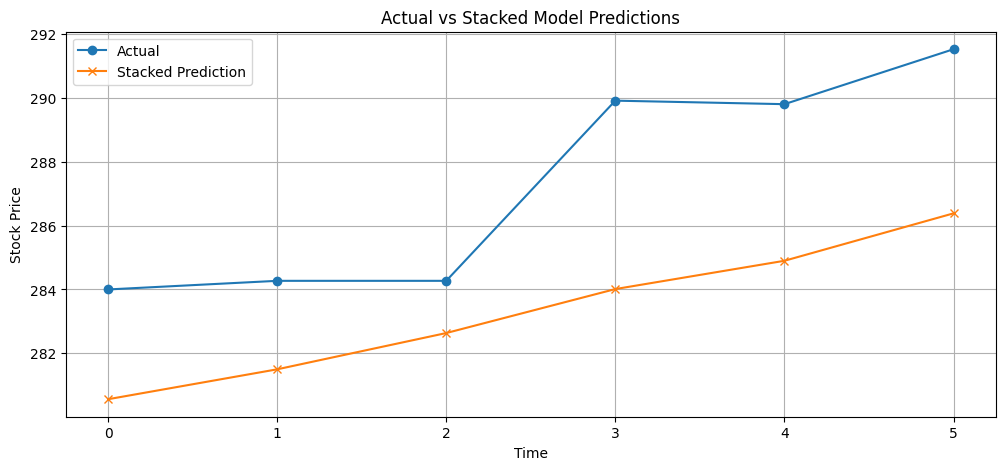

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.plot(y_meta_test, label="Actual", marker='o')
plt.plot(stacked_pred, label="Stacked Prediction", marker='x')

plt.title("Actual vs Stacked Model Predictions")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
print(len(pred_arima))
print(len(pred_sarima))
print(len(X_meta))


30
30
30


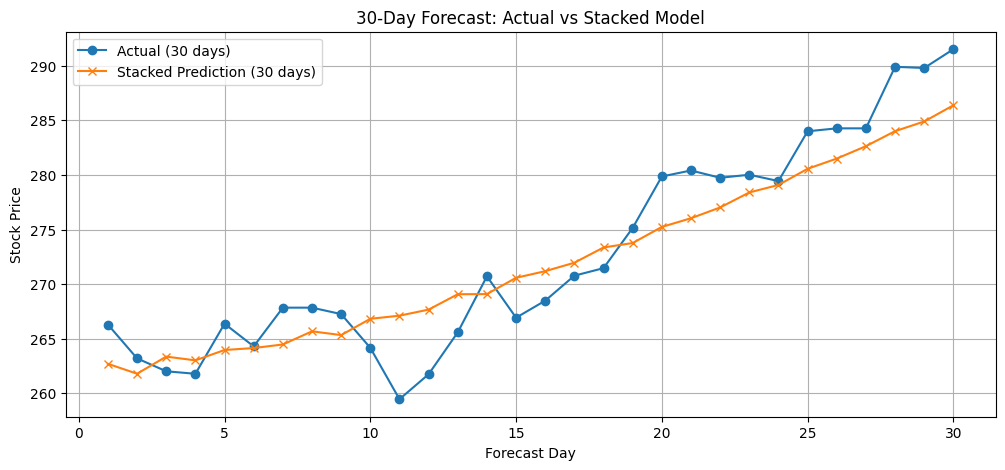

In [ ]:
#(Stacked vs Actual)
import matplotlib.pyplot as plt
import numpy as np

days = np.arange(1, len(y_meta) + 1)   # 1 to 30

plt.figure(figsize=(12,5))

plt.plot(days, y_meta, marker='o', label="Actual (30 days)")
plt.plot(days, ridge_meta.predict(X_meta), marker='x', label="Stacked Prediction (30 days)")

plt.xlabel("Forecast Day")
plt.ylabel("Stock Price")
plt.title("30-Day Forecast: Actual vs Stacked Model")
plt.legend()
plt.grid(True)

plt.show()


# XGBOOST META-MODEL

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt


In [ ]:
pred_ses        = np.asarray(ses_forecast, dtype=float)
pred_es         = np.asarray(es_forecast, dtype=float)
pred_arima      = np.asarray(arima_forecast, dtype=float)
pred_sarima     = np.asarray(sarima_forecast, dtype=float)
pred_logsarima  = np.asarray(log_sarima_forecast, dtype=float)
pred_lr         = np.asarray(yhat_test_lr, dtype=float)


In [ ]:
X_meta = pd.DataFrame({
    "SES": pred_ses,
    "ES": pred_es,
    "ARIMA": pred_arima,
    "SARIMA": pred_sarima,
    "LOG_SARIMA": pred_logsarima,
    "Linear_Regression": pred_lr
})

y_meta = np.asarray(y_test, dtype=float)


In [ ]:
split = int(len(X_meta) * 0.8)

X_meta_train = X_meta.iloc[:split]
X_meta_test  = X_meta.iloc[split:]

y_meta_train = y_meta[:split]
y_meta_test  = y_meta[split:]


In [ ]:
xgb_meta = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42
)

xgb_meta.fit(X_meta_train, y_meta_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
xgb_param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [2, 3, 4, 5],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9]
}


In [ ]:
xgb_base = XGBRegressor(
    objective="reg:squarederror",
    random_state=42
)

xgb_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=xgb_param_grid,
    n_iter=20,
    cv=3,
    scoring="neg_root_mean_squared_error",
    verbose=1,
    n_jobs=-1
)

xgb_search.fit(X_meta_train, y_meta_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 500],
                                        'subsample': [0.7, 0.8, 0.9]},
                   scoring='neg_root_mean_squared_error', verbose=1)

In [ ]:
best_xgb = xgb_search.best_estimator_
print("Best Params:", xgb_search.best_params_)


Best Params: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 0.8}


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

xgb_pred = best_xgb.predict(X_meta_test)

rmse_xgb = sqrt(mean_squared_error(y_meta_test, xgb_pred))
mae_xgb  = mean_absolute_error(y_meta_test, xgb_pred)

print("Tuned XGB RMSE:", rmse_xgb)
print("Tuned XGB MAE :", mae_xgb)


Tuned XGB RMSE: 0.00875760324982782
Tuned XGB MAE : 0.0053918103689533465


In [ ]:
import pandas as pd

feature_importance = pd.Series(
    best_xgb.feature_importances_,
    index=X_meta.columns
).sort_values(ascending=False)

print(feature_importance)


Linear_Regression    0.363027
LOG_SARIMA           0.240796
ARIMA                0.158414
ES                   0.140442
SARIMA               0.097320
SES                  0.000000
dtype: float32


In [ ]:
final_xgb_pred = best_xgb.predict(X_meta_test)



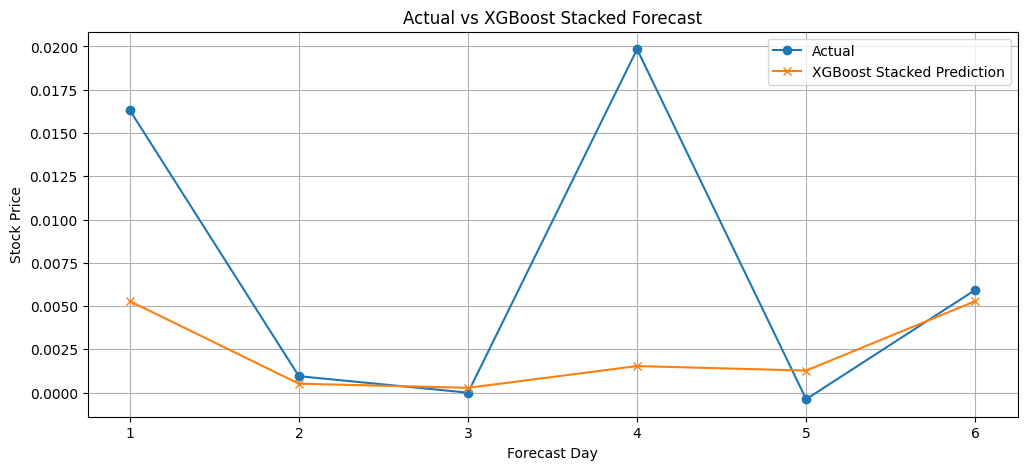

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

days = np.arange(1, len(y_meta_test) + 1)

plt.figure(figsize=(12,5))

plt.plot(days, y_meta_test, marker='o', label="Actual")
plt.plot(days, final_xgb_pred, marker='x', label="XGBoost Stacked Prediction")

plt.xlabel("Forecast Day")
plt.ylabel("Stock Price")
plt.title("Actual vs XGBoost Stacked Forecast")
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
import joblib

joblib.dump(final_model_ses, "ses_model.joblib")
joblib.dump(final_model_es, "es_model.joblib")
joblib.dump(final_model_arima, "arima_model.joblib")
joblib.dump(final_model_sarima, "sarima_model.joblib")
joblib.dump(final_model_log_sarima, "log_sarima_model.joblib")
joblib.dump(lr, "linear_regression_meta.joblib")  # if used as base/meta
joblib.dump(best_xgb, "best_xgb_model.joblib")

Best XGBoost model saved to best_xgb_model.joblib
